In [1]:
from sklearn.neighbors import KNeighborsClassifier
from datetime import datetime, timedelta
import sklearn.metrics as m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_path = "../data/features_encoded.csv"
raw_data = pd.read_csv(input_path, header=0, skiprows=None, index_col=None, delimiter=",")

labels = raw_data['malicious'].apply(lambda x: 1 if x else 0)
features = raw_data.drop('malicious', axis=1)

train_features = features.iloc[:80000, :]
test_features = features.iloc[80000:, :]
train_labels = labels[:80000]
test_labels = labels[80000:]

In [3]:
def calculateNormalizationParams(data):
    means = data.mean()
    stdevs = data.std()
    stdevs[stdevs == 0] = 1  # Replace 0 std to avoid division by zero
    return means, stdevs

def applyNormalization(data, means, stdevs):
    return (data - means) / stdevs

In [4]:
means, stdevs = calculateNormalizationParams(train_features)
normalizedTrainFeatures = applyNormalization(train_features, means, stdevs)
normalizedTestFeatures = applyNormalization(test_features, means, stdevs)

In [5]:
best_n = 1
best_classifier = knn = KNeighborsClassifier(n_neighbors=best_n).fit(normalizedTrainFeatures,train_labels)
prev_predict = best_classifier.predict(normalizedTrainFeatures)

C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

In [8]:
def acc(data, labels, n):
    global best_n,best_classifier,prev_predict
    t0 = datetime.now()
    knn = KNeighborsClassifier(n_neighbors=n).fit(data, labels)
    predictions = knn.predict(data)
    if(m.accuracy_score(labels,predictions) > m.accuracy_score(labels,prev_predict)):
        prev_predict = predictions
        best_classifier = knn
        best_n = n
    tn = datetime.now() - t0
    tn = tn - timedelta(microseconds=tn.microseconds)
    return (n, m.accuracy_score(labels, predictions), tn)

In [9]:
n_vector = [1, 3, 5, 7, 10]
scores = [acc(normalizedTrainFeatures, train_labels, n) for n in n_vector]
for i, score in enumerate(scores):
    print("n_neighbors = " + str(score[0]) + ", accuracy = " + str(score[1]) + ", t = " + str(score[2]))

C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

n_neighbors = 1, accuracy = 0.998925, t = 0:00:11
n_neighbors = 3, accuracy = 0.9145125, t = 0:00:22
n_neighbors = 5, accuracy = 0.8847125, t = 0:00:26
n_neighbors = 7, accuracy = 0.8677625, t = 0:00:29
n_neighbors = 10, accuracy = 0.8474125, t = 0:00:33


In [10]:
x = [n[0] for n in scores]
y = [n[1] for n in scores]

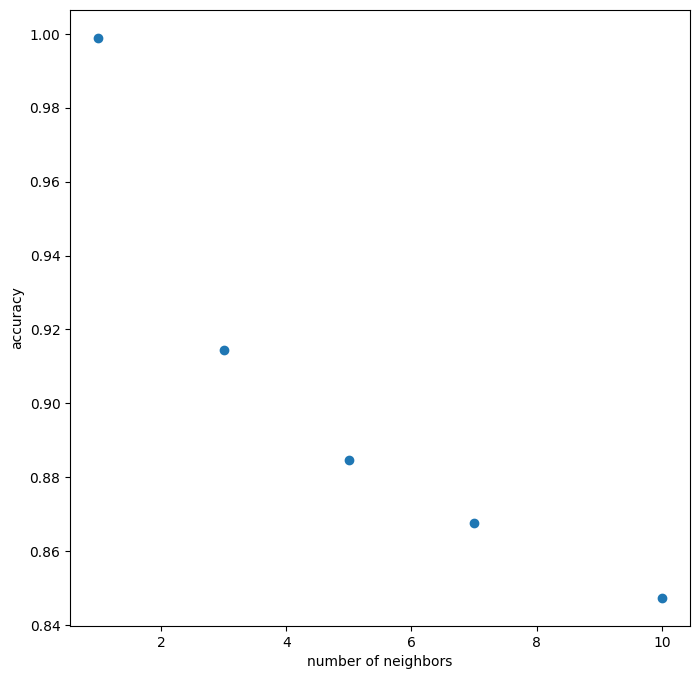

In [12]:
fig = plt.figure(1, figsize=(8, 8))
ax = fig.add_subplot()
ax.scatter(x, y)
ax.set_xlabel('number of neighbors')
ax.set_ylabel('accuracy')
plt.show()

In [15]:
knn = best_classifier
predictions = knn.predict(normalizedTestFeatures)
probs = knn.predict_proba(normalizedTestFeatures)
probs = pd.DataFrame(probs)
probs = probs.apply(lambda x: max(x[0],x[1]), axis=1)

C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

In [16]:
acc = m.accuracy_score(test_labels, predictions)
prec = m.precision_score(test_labels, predictions)
recall = m.recall_score(test_labels, predictions)
f1 = m.f1_score(test_labels,predictions)
auc = m.roc_auc_score(test_labels,probs)
print("Accuracy score: " + str(acc))
print("Precision score: " + str(prec))
print("Recall score: " + str(recall))
print("F1 score: ", f1)
print("AUC-ROC: ", auc)

Accuracy score: 0.8279086045697716
Precision score: 0.7880283472538597
Recall score: 0.7789592194145609
F1 score:  0.7834675390035228
AUC-ROC:  0.5


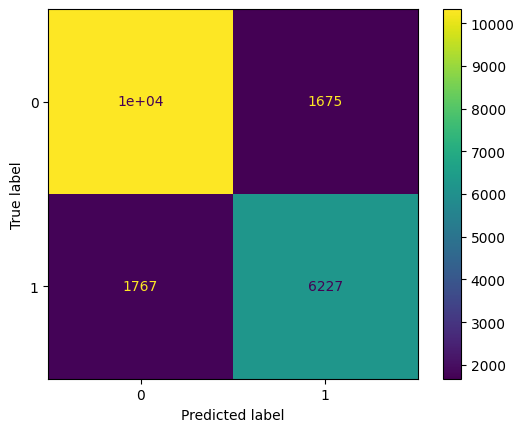

In [17]:
m.ConfusionMatrixDisplay(m.confusion_matrix(test_labels, predictions)).plot()

In [18]:
import pickle
with open('trained_models/knn.pkl','wb') as f:
    pickle.dump(knn,f)
print("Model dump complete!")

Model dump complete!
